# Imputación de datos 

## Numérico edades

hot-deck: consiste en elegir el valor más cercano (anterior) al dato faltante y a partir de ahi se va recorriendo uno a uno


valores faltantes 1323


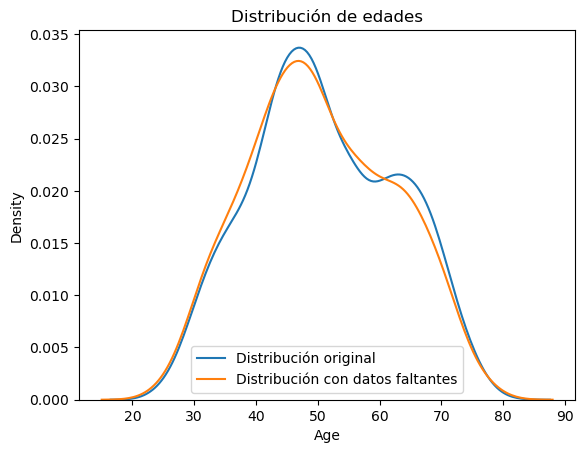

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
database=pd.read_csv("C:\\Users\\aldoa\\Machine Learning\\Practica 1 datos tabulares\\Database_mejorada.csv")

# hacer base de datos faltantes
db1=database['Age'].copy()
#print(db1.shape[0])
porc_fal=0.6 # Cambiar cantidad de datos faltantes
n_faltantes=int(porc_fal*db1.shape[0])
falt=np.random.choice(db1.shape[0],size=(1,n_faltantes),replace=False)
#for a in range(n_faltantes):
db2=database['Age'].copy()
for a in range(n_faltantes):   
    db2[falt[0,a]]=np.nan

print('valores faltantes',db2.isna().sum())

sns.kdeplot(database['Age']).set(title='Distribución de edades')
sns.kdeplot(db2)
plt.legend(['Distribución original','Distribución con datos faltantes'])
#sns.title('distribución original de edades')
    

In [33]:
def hot_deck(db):
    p=0
    for ab in range(db.shape[0]):
        if np.isnan(db[ab]):
            p=ab
            if p==0:
                db[0]=np.random.choice(db[~np.isnan(db)])
            else:
                break

        
    for xt in range(db.shape[0]):
        if np.isnan(db[xt]):
            db[xt]=db[p-1]
            p+=1
    return db

def i_al(db):
    rch=0
    for xt in range(db.shape[0]):
        if np.isnan(db[xt]):
            rch=np.random.choice(db[~np.isnan(db)])
            db[xt]=rch
    return db

# moda
def moda(db):
    moda=db.mode()[0]
    for xt in range(db.shape[0]):
        if np.isnan(db[xt]):
            db[xt]=moda
    return db

def media(db):
    med=int(db.mean())
    db=db.fillna(med)
    return db
def mediana(db):
    med=int(db.median())
    db=db.fillna(med)
    return db

0


<AxesSubplot:xlabel='Age', ylabel='Density'>

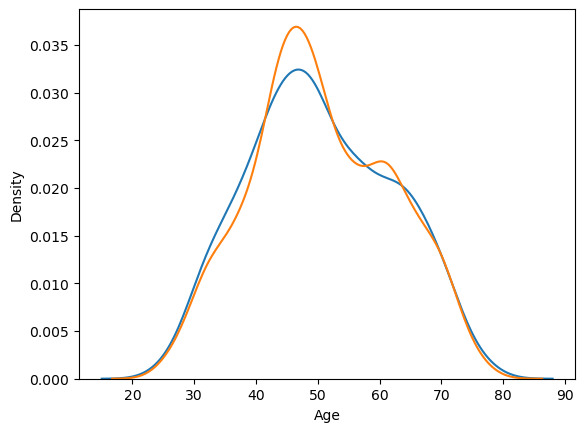

In [34]:
# Método aleatorio
db3=db2.copy()
dbrand=i_al(db3)
print(dbrand.isna().sum())
sns.kdeplot(db2)
sns.kdeplot(dbrand)

0


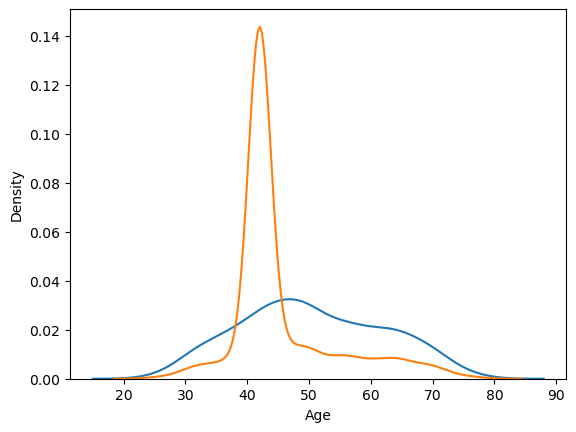

In [35]:
db4=db2.copy()
dbmoda=moda(db4)
sns.kdeplot(db2)
sns.kdeplot(dbmoda)
print(dbmoda.isna().sum())

0


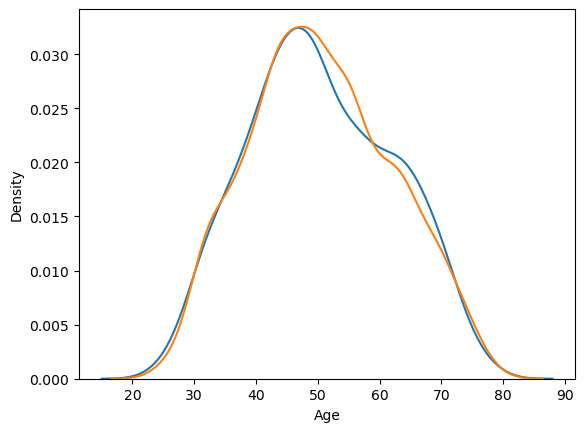

In [36]:
db5=db2.copy()
dbhd=hot_deck(db5)
sns.kdeplot(db2)
sns.kdeplot(dbhd)
print(dbhd.isna().sum())

0


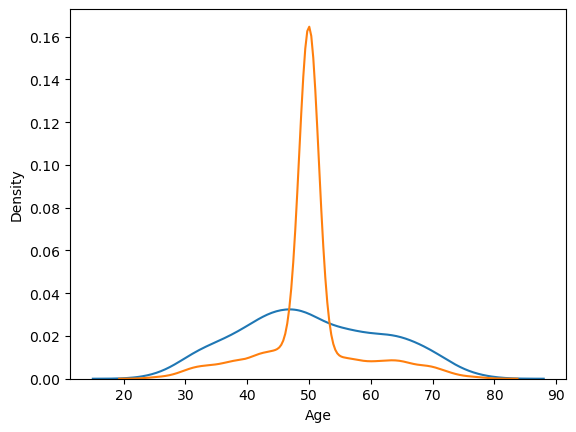

In [37]:
# media
db6=db2.copy()
dbmed=media(db6)
sns.kdeplot(db2)
sns.kdeplot(dbmed)
print(dbmed.isna().sum())

0


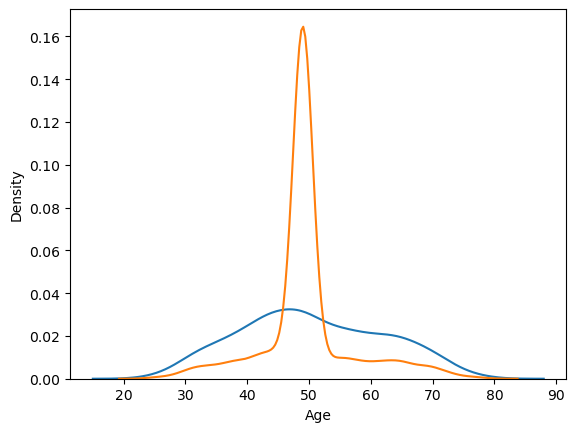

In [38]:
# Mediana
db7=db2.copy()
dbmediana=mediana(db7)
sns.kdeplot(db2)
sns.kdeplot(dbmediana)
print(dbmediana.isna().sum())

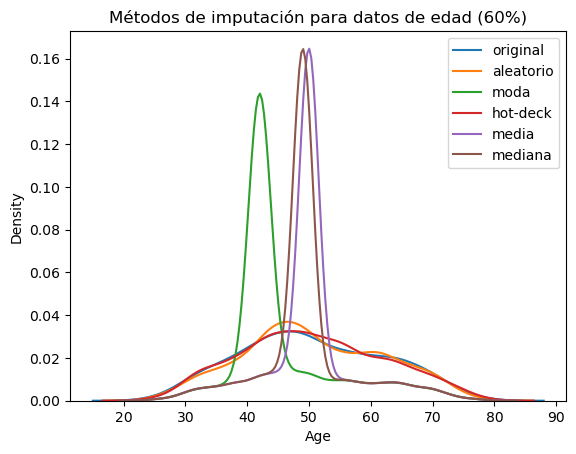

In [39]:
## Distribuciones
sns.kdeplot(db2).set(title='Métodos de imputación para datos de edad (60%)')
sns.kdeplot(dbrand)
sns.kdeplot(dbmoda)
sns.kdeplot(dbhd)
sns.kdeplot(dbmed)
sns.kdeplot(dbmediana)
plt.legend(['original','aleatorio','moda','hot-deck','media','mediana'])

# Para estatus marital

- Si es anonima = 0
- Si es divorciad@ = 1
- Si es casad@ = 2
- Si es solter@ = 3
- Si esta juntad@ = 4
- Si es viud@ =5
- Si se desconoce (dato faltante) = 6

[Text(0.5, 1.0, 'Distribución original de estado marital')]

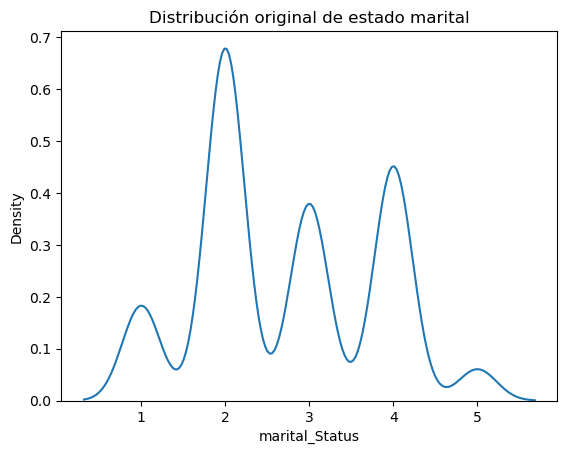

In [40]:
sns.kdeplot(database['marital_Status']).set(title='Distribución original de estado marital')

In [41]:
# hacer base de datos faltantes
db1=database['marital_Status'].copy()
#print(db1.shape[0])
porc_fal=0.6
n_faltantes=int(porc_fal*db1.shape[0])
falt=np.random.choice(db1.shape[0],size=(1,n_faltantes),replace=False)
#for a in range(n_faltantes):
db2=database['marital_Status'].copy()
for a in range(n_faltantes):   
    db2[falt[0,a]]=np.nan

print('valores faltantes',db2.isna().sum())

valores faltantes 1323


0


<AxesSubplot:xlabel='marital_Status', ylabel='Density'>

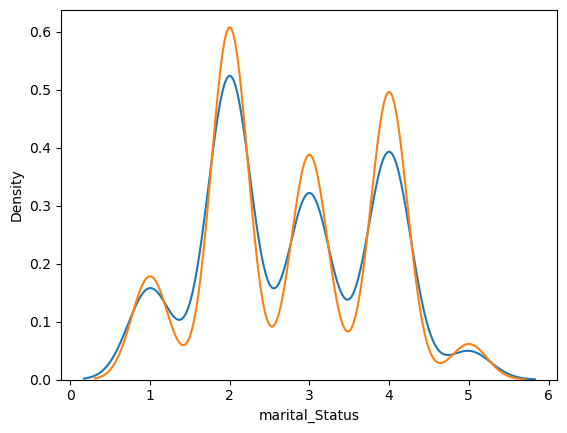

In [42]:
db3=db2.copy()
dbrand=i_al(db3)
print(dbrand.isna().sum())
sns.kdeplot(db2)
sns.kdeplot(dbrand)

0


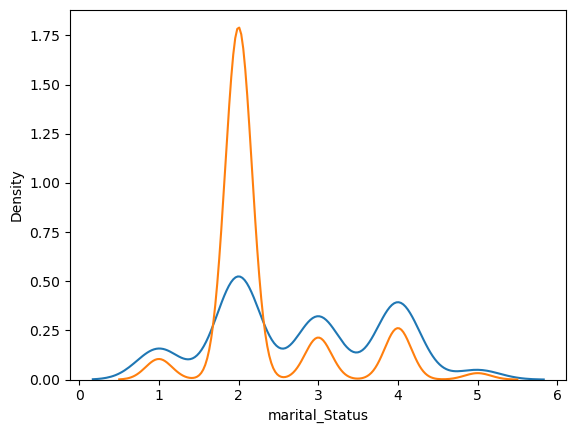

In [43]:
db4=db2.copy()
dbmoda=moda(db4)
sns.kdeplot(db2)
sns.kdeplot(dbmoda)
print(dbmoda.isna().sum())

0


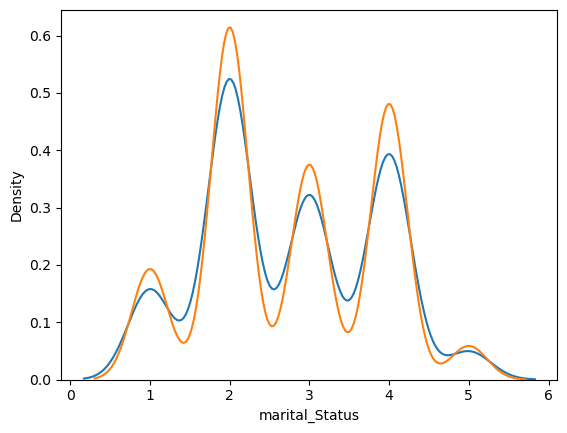

In [44]:
db5=db2.copy()
dbhd=hot_deck(db5)
sns.kdeplot(db2)
sns.kdeplot(dbhd)
print(dbhd.isna().sum())

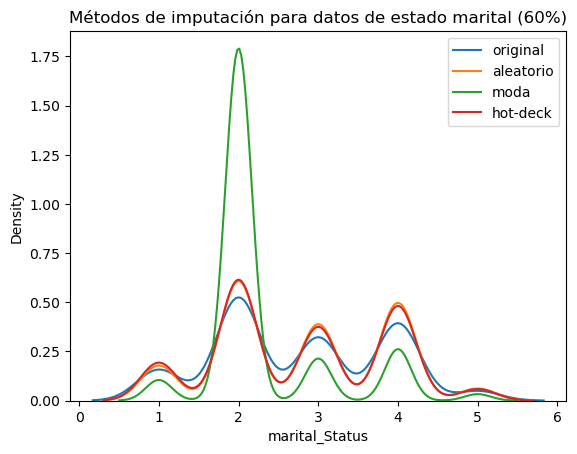

In [45]:
## Distribuciones
sns.kdeplot(db2).set(title='Métodos de imputación para datos de estado marital (60%)')
sns.kdeplot(dbrand)
sns.kdeplot(dbmoda)
sns.kdeplot(dbhd)

plt.legend(['original','aleatorio','moda','hot-deck'])

## Métricas de evaluación para datos continuos

Para las funciones continuas se tienen las siguientes métricas de evaluación

## Error relativo porcentual

<div class="alert alert-block alert-info">
    $$e_{rp}=\frac{|\hat{y}-y|}{|\hat{y}|}*100\% $$
</div>



## RMSE

Error medio cuadrático.
definido como:
<div class="alert alert-block alert-info">
    $$RMSE=\sqrt{\frac{\sum_{i=1}^n (\hat{y}_i-y_i)^2}{n}} $$
donde: 

- $\hat{y}_i$ es el valor verdadero de la serie de tiempo
- $y_i $ es el valor imputado
</div>

## MAE
error medio absoluto
<div class="alert alert-block alert-info">
    $$MAE=\frac{1}{n}\sum_{i=1}^n |\hat{y}_i-y_i| $$
</div>


## MAD 
Desviación absoluto de la media
<div class="alert alert-block alert-info">
    $$MAD=\frac{\sum_{i=1}^n |y_i - \bar{y}|}{n} $$
</div>


In [46]:
def e_rp(yh,yi):
    return (abs(yh-yi))/abs(yh)

def rmse(yh,yi):
    n=len(yi)
    temp=0
    for a in range(n):
        temp=temp+(yh[a]-yi[a])**2
    res=np.sqrt(temp/n)
    return res

def mae(yh,yi):
    temp=0
    for a in range(len(yh)):
        temp=temp+abs(yh[a]-yi[a])
    return temp/len(yh)

def mad(yi):
    yb=sum(yi)/len(yi)
    temp=0
    for a in range(len(yi)):
        temp=temp+abs(yi[a]-yb)
    return temp/len(yi)

# Imputación de datos
## Continuos

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt
## Importanto las bases de datos
cont_data=pd.read_csv('C:\\Users\\aldoa\\Machine Learning\\Practica 2 Imputación de datos\\Nasdaq.csv') 
#https://finance.yahoo.com/quote/%5EIXIC/history?p=%5EIXIC
#cont_data=pd.DataFrame(cont_data).set_index('Index')
cont_data=cont_data.to_numpy()

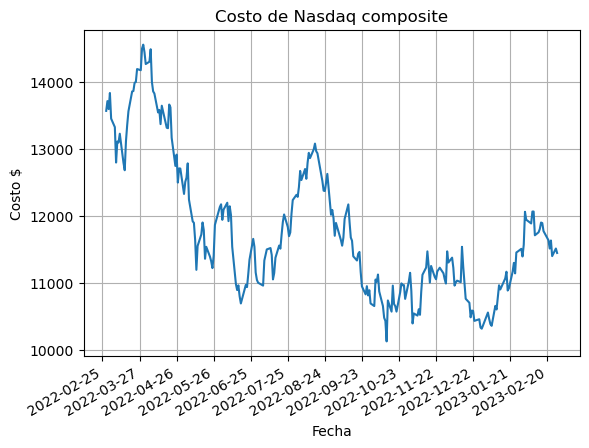

In [48]:
x = [dt.strptime(d,'%Y-%m-%d').date() for d in cont_data[:,0]]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.plot(x,cont_data[:,1])
plt.gcf().autofmt_xdate()
plt.xlabel('Fecha')
plt.ylabel('Costo $')
plt.title('Costo de Nasdaq composite')
plt.grid()
plt.show()

## Método aleatorio

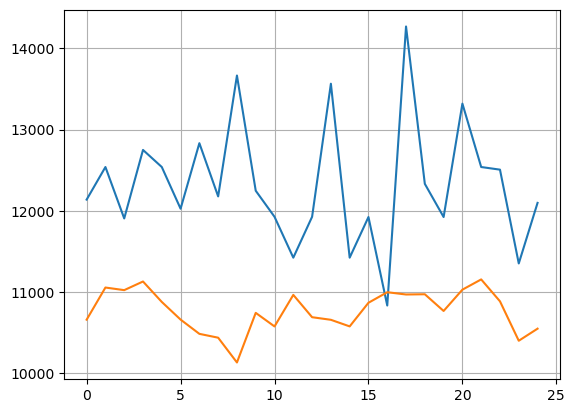

In [49]:
import random

def aleatoria(val,pred):
    for a in range(pred):
        val.append(random.choice(val))
    return val
cd=(cont_data[:,1]-np.amin(cont_data[:,1]))/(np.amax(cont_data[:,1])-np.amin(cont_data[:,1]))
precios=cont_data[:,1].tolist()

p_imputado_aleatorio=aleatoria(precios[:150],25)
plt.plot(p_imputado_aleatorio[150:175])
plt.plot(precios[150:175])
plt.grid()

## Método de cadenas de Markov de primer orden y de corto plazo

Para realizar este método primero se debe realizar una categorización en subintervalos entre el valor máximo y el minimo.

1. Posteriormente se realiza la matriz de transición $m_t$ (codificación de datos a discretos).

2. Luego se toma en la matriz de estados $s_t$ y se coloca la máxima probabilidad (1) donde se encuentre el último dato.

3. Se realiza la multiplicación de matrices $s_t\times m_t$.

4. Posteriormente se puede elegir un método de decodificación para obtener el valor requerido.

4. se actualiza la matriz de transición y se repite el paso 3


In [50]:
def markov1_o1(val,bins,pred):
    bin_lims=np.linspace(min(val),max(val),bins)
    print(bin_lims)
    bin_indices=np.digitize(val,bin_lims)-1
    #print(val)
    #print(bin_indices)
    ## crear matriz de transición
    m_t=np.zeros((bins,bins))
    s_t=np.zeros((1,bins))
    s_t[0,bin_indices[-1]]=1
    for a in range(pred):
        m_t=np.zeros((bins,bins))
        for i in range(len(val)-1):
            ct=bin_indices[i]
            nt1=bin_indices[i+1]
            m_t[ct,nt1]+=1
        m_t=m_t/m_t.sum(axis=1,keepdims=True)
        #print(m_t)
        s_t=s_t.dot(m_t)
        ## Con el valor aleatorio maximo
        #print(s_t.dot(m_t))
        p_max=np.where(s_t==np.amax(s_t))
        #print(p_max)
        p_maxx=int(p_max[1])
        bin_indices=np.hstack((bin_indices,p_maxx))
        if p_maxx==bin_lims[-1]:
            val.append(random.uniform(bin_lims[p_maxx],bin_lims[p_maxx]+(bin_lims[p_maxx]-bin_lims[p_maxx-1])))
        else:
            val.append(random.uniform(bin_lims[p_maxx],bin_lims[p_maxx+1]))
        
    return val

[10697.549805   11126.55425378 11555.55870256 11984.56315133
 12413.56760011 12842.57204889 13271.57649767 13700.58094644
 14129.58539522 14558.589844  ]


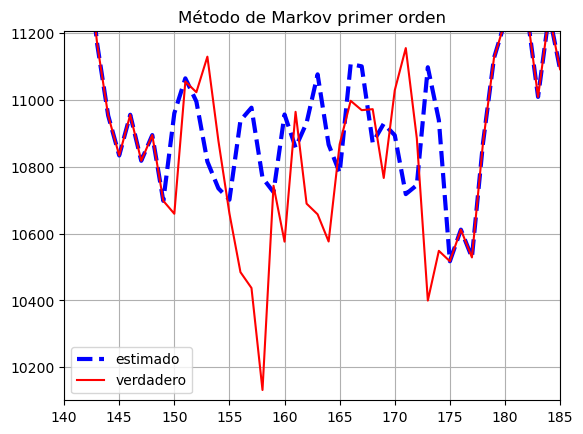

In [51]:
inicio=150
n_p=25
pred=markov1_o1(precios[:inicio],10,n_p) ## este es el bueno
pred2=pred+precios[inicio+n_p:]
plt.plot(pred2,'b--',linewidth=3)
plt.plot(precios,'r')
plt.xlim([inicio-10,inicio+n_p+10])
plt.ylim([min(pred[inicio:inicio+n_p])-600,max(pred[inicio:inicio+n_p])+100])
plt.legend(['estimado','verdadero'])
plt.title('Método de Markov primer orden')
plt.grid()
#result= np.where((markov1_o1(precios,10,1)==np.amax(markov1_o1(precios,10,1))))
#print(result)
#print(int(result[1]))

In [52]:
## markov con 
def markov2_o1(val,bins,pred):
    bin_lims=np.linspace(min(val),max(val),bins)
    print(bin_lims)
    bin_indices=np.digitize(val,bin_lims)-1

    #print(len(bin_indices))
    ## crear matriz de transición
    m_t=np.zeros((bins,bins))
    s_t=np.zeros((1,bins))
    s_t[0,bin_indices[-1]]=1
    for a in range(pred):
        m_t=np.zeros((bins,bins))
        for i in range(len(val)-1):
            ct=bin_indices[i]
            nt1=bin_indices[i+1]
            m_t[ct,nt1]+=1
        m_t=m_t/m_t.sum(axis=1,keepdims=True)
        
        s_t=s_t.dot(m_t)
        p_max=np.where(s_t==np.amax(s_t))
        #print(p_max)
        p_maxx=int(p_max[1])
        bin_indices=np.hstack((bin_indices,p_maxx))
        ## Con pesos del valor del 
        temp=0
        
        for tt in range(bins):
            if tt+1==bins:
                temp=temp+(s_t[0,tt]*random.uniform(bin_lims[tt-1],bin_lims[tt]+(bin_lims[tt-1]-bin_lims[tt-2])))
            else:
                temp=temp+(s_t[0,tt]*random.uniform(bin_lims[tt],bin_lims[tt+1]))
        val.append(temp)
        
    return val

[10697.549805   11126.55425378 11555.55870256 11984.56315133
 12413.56760011 12842.57204889 13271.57649767 13700.58094644
 14129.58539522 14558.589844  ]


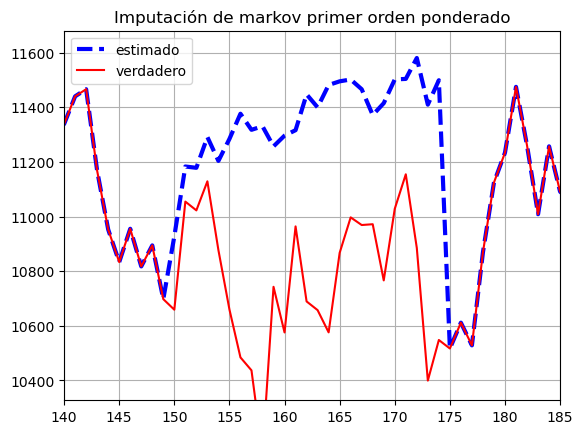

In [53]:
inicio=150
n_p=25
pred12=markov2_o1(precios[:inicio],10,n_p) 
pred2=pred12+precios[inicio+n_p:]
plt.plot(pred2,'b--',linewidth=3)
plt.plot(precios,'r')
plt.xlim([inicio-10,inicio+n_p+10])
plt.ylim([min(pred12[inicio:inicio+n_p])-600,max(pred12[inicio:inicio+n_p])+100])
plt.legend(['estimado','verdadero'])
plt.title('Imputación de markov primer orden ponderado')
plt.grid()

## Markov de segundo orden

se agrega un eje extra para conocer el valor anterior se obtiene a partir del cruce de probabilidades el nuevo estado.


In [54]:
def markov_o2(val,bins,pred):
    bin_lims=np.linspace(min(val),max(val),bins)
    #print(bin_lims)
    bin_indices=np.digitize(val,bin_lims)-1

    #print(len(bin_indices))
    ## crear matriz de transición
    m_t=np.zeros((bins,bins,bins))
    s_t=np.zeros((1,bins**2))
    s_t[0,bin_indices[-1]]=0.9
    s_t[0,bin_indices[-2]]=0.1
    lbins=[]
    for r in range(bins):
        lbins.append(r)
    for a in range(pred):
        m_t=np.zeros((bins,bins,bins))
        for i in range(2,len(val)): ## Agregar la siguiente parte
            ct=bin_indices[i-2] # estado anterior
            nt1=bin_indices[i-1] # estado actual 
            nt2=bin_indices[i] # estado siguiente
            
            m_t[ct,nt1,nt2]+=1

        # Obtener las sumas de cada fila sin contar los ceros
        row_sums = np.sum(m_t, axis=2)
        nonzero_rows = np.count_nonzero(m_t, axis=2)
        row_sums[nonzero_rows == 0] = 1 # Asignar 1 a las filas que solo contienen ceros

        # Dividir cada fila por su suma
        m_t = m_t / row_sums[:,:,np.newaxis]
        #print(m_t.shape)
        #m_t=m_t/m_t.sum(axis=2,keepdims=True)
        ## predicciones
        e_2=bin_indices[-2]
        e_1=bin_indices[-1]
        probs=m_t[e_2,e_1,:]
        next_state=np.random.choice(lbins,p=probs)
        bin_indices=np.hstack((bin_indices,next_state))
        p_maxx=next_state
        if p_maxx==bin_lims[-1]:
            val.append(random.uniform(bin_lims[p_maxx],bin_lims[p_maxx]+(bin_lims[p_maxx]-bin_lims[p_maxx-1])))
        else:
            val.append(random.uniform(bin_lims[p_maxx],bin_lims[p_maxx+1]))
        """
        p_maxx=int(p_max[1])
        bin_indices=np.hstack((bin_indices,p_maxx))
        ## Con pesos del valor del 
        temp=0
        
        for tt in range(bins):
            if tt+1==bins:
                temp=temp+(s_t[0,tt]*random.uniform(bin_lims[tt-1],bin_lims[tt]+(bin_lims[tt-1]-bin_lims[tt-2])))
            else:
                temp=temp+(s_t[0,tt]*random.uniform(bin_lims[tt],bin_lims[tt+1]))
        val.append(temp)
        """
    return val

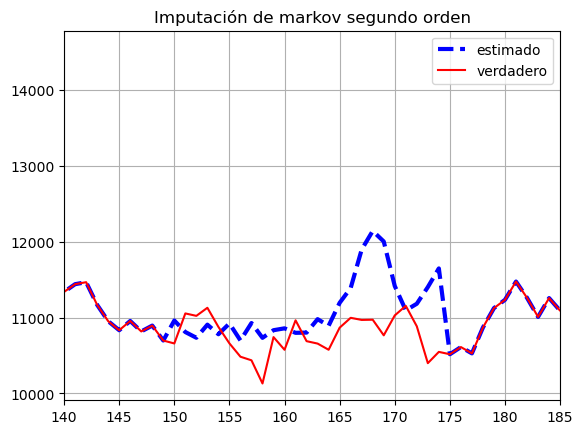

In [55]:
inicio=150
n_p=25
pred_m2=markov_o2(precios[:inicio],28,n_p) 
pred2=pred_m2+precios[inicio+n_p:]
plt.plot(pred2,'b--',linewidth=3)
plt.plot(precios,'r')
plt.xlim([inicio-10,inicio+n_p+10])
#plt.ylim([min(pred[inicio:inicio+n_p])-600,max(pred[inicio:inicio+n_p])+100])
plt.legend(['estimado','verdadero'])
plt.title('Imputación de markov segundo orden')
plt.grid()

## Media móvil con retraso y ponderada

In [56]:
def m_movil(retraso,val,n_pred):
    temp=0

    for a in range(n_pred):
        l=len(val)-1
        temp=0
        for b in range(retraso):
            temp=temp+val[l-b]
        temp/=retraso
        val.append(temp)
    return val


def m_movil_p(retraso,val,n_pred):
    temp=0
    j=(retraso*(retraso+1))/2
    for a in range(n_pred):
        l=len(val)-1
        temp=0
        for b in range(retraso):
            temp=temp+(((b+1)*val[l-retraso+b])/j)
        val.append(temp)
    return val

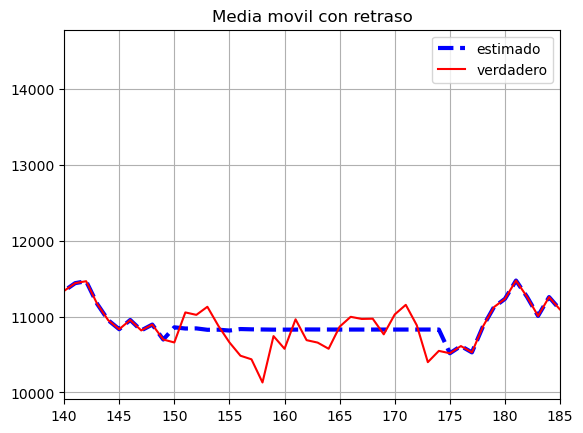

In [57]:
inicio=150
n_p=25
pred_m_movil=m_movil(6,precios[:inicio],n_p) ##
pred2_m=pred_m_movil+precios[inicio+n_p:]
plt.plot(pred2_m,'b--',linewidth=3)
plt.plot(precios,'r')
plt.xlim([inicio-10,inicio+n_p+10])
#plt.ylim([min(pred[inicio:inicio+n_p])-600,max(pred[inicio:inicio+n_p])+100])
plt.legend(['estimado','verdadero'])
plt.title('Media movil con retraso')
plt.grid()

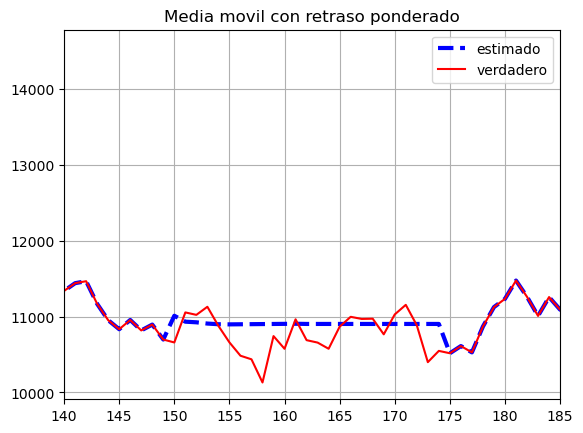

In [58]:
## Media movil con retraso ponderado
inicio=150
n_p=25
pred_m_movil_p=m_movil_p(10,precios[:inicio],n_p) ##
pred2_mp=pred_m_movil_p+precios[inicio+n_p:]
plt.plot(pred2_mp,'b--',linewidth=3)
plt.plot(precios,'r')
plt.xlim([inicio-10,inicio+n_p+10])
#plt.ylim([min(pred[inicio:inicio+n_p])-600,max(pred[inicio:inicio+n_p])+100])
plt.legend(['estimado','verdadero'])
plt.title('Media movil con retraso ponderado')
plt.grid()

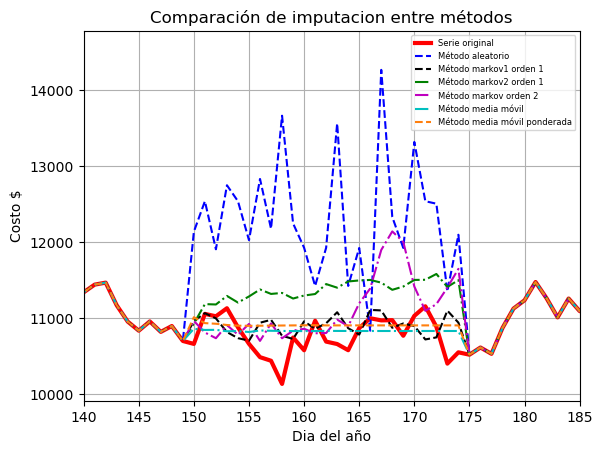

In [62]:

## inicio 150 con 25 predicciones y fin en 175
p_imputado_aleatorio # aleatorio
pred # markov1 orden 1
pred12 # markov2 orden 1
pred_m2 # markov orden 2
pred_m_movil # media movil
pred_m_movil_p # media movil ponderada

# Gráficas

plt.plot(precios,'r',linewidth=3)
plt.plot(p_imputado_aleatorio+precios[inicio+n_p:],'b--')
plt.plot(pred+precios[inicio+n_p:],'k--')
plt.plot(pred12+precios[inicio+n_p:],'g-.')
plt.plot(pred_m2+precios[inicio+n_p:],'m-.')
plt.plot(pred_m_movil+precios[inicio+n_p:],'c-.')
plt.plot(pred_m_movil_p+precios[inicio+n_p:],'tab:orange',ls='--')
plt.xlim([inicio-10,inicio+n_p+10])
plt.legend(['Serie original','Método aleatorio','Método markov1 orden 1',
            'Método markov2 orden 1','Método markov orden 2','Método media móvil',
            'Método media móvil ponderada'],prop={'size':6},loc='upper right')
plt.xlabel('Dia del año')
plt.ylabel('Costo $')
plt.title('Comparación de imputacion entre métodos')
plt.grid()

In [64]:
## Métricas para series de puntos
## rmse
rmc=[]
a1=rmse(precios[inicio:inicio+n_p],p_imputado_aleatorio[inicio:inicio+n_p])
rmc.append(a1)
a1=rmse(precios[inicio:inicio+n_p],pred[inicio:inicio+n_p])
rmc.append(a1)
a1=rmse(precios[inicio:inicio+n_p],pred12[inicio:inicio+n_p])
rmc.append(a1)
a1=rmse(precios[inicio:inicio+n_p],pred_m2[inicio:inicio+n_p])
rmc.append(a1)
a1=rmse(precios[inicio:inicio+n_p],pred_m_movil[inicio:inicio+n_p])
rmc.append(a1)
a1=rmse(precios[inicio:inicio+n_p],pred_m_movil_p[inicio:inicio+n_p])
rmc.append(a1)

# MAE
maec=[]
a1=mae(precios[inicio:inicio+n_p],p_imputado_aleatorio[inicio:inicio+n_p])
maec.append(a1)
a1=mae(precios[inicio:inicio+n_p],pred[inicio:inicio+n_p])
maec.append(a1)
a1=mae(precios[inicio:inicio+n_p],pred12[inicio:inicio+n_p])
maec.append(a1)
a1=mae(precios[inicio:inicio+n_p],pred_m2[inicio:inicio+n_p])
maec.append(a1)
a1=mae(precios[inicio:inicio+n_p],pred_m_movil[inicio:inicio+n_p])
maec.append(a1)
a1=mae(precios[inicio:inicio+n_p],pred_m_movil_p[inicio:inicio+n_p])
maec.append(a1)
#MAD
madc=[]
a1=mad(p_imputado_aleatorio[inicio:inicio+n_p])
madc.append(a1)
a1=mad(pred[inicio:inicio+n_p])
madc.append(a1)
a1=mad(pred12[inicio:inicio+n_p])
madc.append(a1)
a1=mad(pred_m2[inicio:inicio+n_p])
madc.append(a1)
a1=mad(pred_m_movil[inicio:inicio+n_p])
madc.append(a1)
a1=mad(pred_m_movil_p[inicio:inicio+n_p])
madc.append(a1)
print('rmse: ',rmc)
print('mae: ',maec)
print('mad: ',madc)
print('mad real:',mad(precios[inicio:inicio+n_p]))

rmse:  [1752.2246327376595, 317.9567113716203, 655.1019263044956, 559.1797793548402, 260.1307804299107, 288.34349054782945]
mae:  [1570.0339062000005, 252.36607860447447, 591.5113166050114, 436.53238390646214, 217.054585838251, 227.49350757841]
mad:  [580.7418626208004, 107.69166741924339, 111.20804569041233, 335.1903624807304, 4.624181215804128, 11.305144053204423]
mad real: 214.5460594464001


In [61]:
## Medición por puntos
#datos=cont_data[:,1].tolist()
rnd=np.random.randint(100,len(precios)-1,(5,1))
rnd2=rnd.tolist()
res_al=[]
res_mk11=[]
res_mk21=[]
res_mk12=[]
res_mm=[]
res_mmp=[]
er=[]
resv=[]
print(rnd)
print('valor verdadero')
for u in range(len(rnd2)):
    resv.append(precios[rnd[u,0]])
print(resv)
print("*******")
for t in range(len(rnd2)):
    r_al=aleatoria(precios[:rnd[t,0]],1)
    res_al.append(r_al[-1])
    
    r_mar11=markov1_o1(precios[:rnd[t,0]],10,1)
    res_mk11.append(r_mar11[-1])
    
    r_mar21=markov2_o1(precios[:rnd[t,0]],10,1)
    res_mk21.append(r_mar21[-1])
    
    r_mar12=markov_o2(precios[:rnd[t,0]],10,1)
    res_mk12.append(r_mar12[-1])
    
    r_mm=m_movil(6,precios[:rnd[t,0]],1)
    res_mm.append(r_mm[-1])
    
    r_mmp=m_movil_p(6,precios[:rnd[t,0]],1)
    res_mmp.append(r_mmp[-1])
print("*** Resultados ****")
print(res_al)
print(res_mk11)
print(res_mk21)
print(res_mk12)
print(res_mm)
print(res_mmp)

[[126]
 [202]
 [236]
 [183]
 [237]]
valor verdadero
[12021.049805, 11012.620117, 11904.410156, 11008.669922, 11891.25]
*******
[10697.549805   11126.55425378 11555.55870256 11984.56315133
 12413.56760011 12842.57204889 13271.57649767 13700.58094644
 14129.58539522 14558.589844  ]
[10697.549805   11126.55425378 11555.55870256 11984.56315133
 12413.56760011 12842.57204889 13271.57649767 13700.58094644
 14129.58539522 14558.589844  ]
[10131.820313   10623.68359422 11115.54687544 11607.41015667
 12099.27343789 12591.13671911 13083.00000033 13574.86328156
 14066.72656278 14558.589844  ]
[10131.820313   10623.68359422 11115.54687544 11607.41015667
 12099.27343789 12591.13671911 13083.00000033 13574.86328156
 14066.72656278 14558.589844  ]
[10131.820313   10623.68359422 11115.54687544 11607.41015667
 12099.27343789 12591.13671911 13083.00000033 13574.86328156
 14066.72656278 14558.589844  ]
[10131.820313   10623.68359422 11115.54687544 11607.41015667
 12099.27343789 12591.13671911 13083.00000